In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib


In [2]:

# 3. Load data
alcohol = pd.read_sas('datasets/ALQ_I.xpt')

# 4. Rename columns
column_rename_map = {
    'SEQN': 'RespondentID',
    'ALQ101': '12DrinksPerYear',
    'ALQ110': '12DrinksLifetime',
    'ALQ120Q': 'DrinkFrequencyPastYear',
    'ALQ120U': 'DrinkFrequencyUnit',
    'ALQ130': 'AvgDrinksPerDayPastYear',
    'ALQ141Q': 'Days4or5DrinksPastYear',
    'ALQ141U': 'Days4or5DrinksUnit',
    'ALQ151': 'Ever4or5DrinksEveryDay',
    'ALQ160': 'Days4or5Drinks2HoursPastMonth'
}

# Now this will work:
alcohol = alcohol.rename(columns=column_rename_map)

column_rename_map = { 'SEQN': 'RespondentID', 'ALQ101': '12DrinksPerYear',
    'ALQ110': '12DrinksLifetime',
    'ALQ120Q': 'DrinkFrequencyPastYear',
    'ALQ120U': 'DrinkFrequencyUnit',
    'ALQ130': 'AvgDrinksPerDayPastYear',
    'ALQ141Q': 'Days4or5DrinksPastYear',
    'ALQ141U': 'Days4or5DrinksUnit',
    'ALQ151': 'Ever4or5DrinksEveryDay',
    'ALQ160': 'Days4or5Drinks2HoursPastMonth' }


In [3]:
alcohol = alcohol.rename(columns=column_rename_map)

# 5. Clean "Refused" and "Don't know" codes (7, 9, 777, 999 → NaN)
alcohol = alcohol.replace({7: np.nan, 9: np.nan, 777: np.nan, 999: np.nan})

# 6. Load Demographics and Body Measurements
demo = pd.read_sas('datasets/DEMO_I.xpt')
bmx = pd.read_sas('datasets/BMX_I.xpt')

# 7. Rename key columns in demo and bmx if needed
# (Not strictly necessary unless you want)

# Merge alcohol + demographics
merged = alcohol.merge(demo, left_on='RespondentID', right_on='SEQN')

# Then merge the result with body measurements
merged = merged.merge(bmx, left_on='RespondentID', right_on='SEQN')

# 9. Save the merged cleaned dataset
merged.to_csv('cleaned_nhanes_alcohol.csv', index=False)

In [6]:
# 1. Imports

# 2. Load datasets
alcohol = pd.read_sas('datasets/ALQ_I.xpt')
demo = pd.read_sas('datasets/DEMO_I.XPT')
bmx = pd.read_sas('datasets/BMX_I.XPT')

# 3. Rename alcohol columns
column_rename_map = {
    'SEQN': 'RespondentID',
    'ALQ101': '12DrinksPerYear',
    'ALQ110': '12DrinksLifetime',
    'ALQ120Q': 'DrinkFrequencyPastYear',
    'ALQ120U': 'DrinkFrequencyUnit',
    'ALQ130': 'AvgDrinksPerDayPastYear',
    'ALQ141Q': 'Days4or5DrinksPastYear',
    'ALQ141U': 'Days4or5DrinksUnit',
    'ALQ151': 'Ever4or5DrinksEveryDay',
    'ALQ160': 'Days4or5Drinks2HoursPastMonth'
}
alcohol = alcohol.rename(columns=column_rename_map)

# 4. Replace numeric survey codes with readable text
code_map = {1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know", 777: "Refused", 999: "Don't Know"}
alcohol = alcohol.replace(code_map)

# 5. Merge datasets using IDs
merged = alcohol.merge(demo, left_on='RespondentID', right_on='SEQN')
merged = merged.merge(bmx, left_on='RespondentID', right_on='SEQN')

# 6. Select important columns
columns_to_keep = [
    'RespondentID',          # Unique ID
    'RIAGENDR',              # Sex (1=Male, 2=Female)
    'RIDAGEYR',              # Age
    'BMXWT',                 # Weight (kg)
    'BMXHT',                 # Height (cm)
    '12DrinksPerYear',
    '12DrinksLifetime',
    'DrinkFrequencyPastYear',
    'DrinkFrequencyUnit',
    'AvgDrinksPerDayPastYear',
    'Days4or5DrinksPastYear',
    'Days4or5DrinksUnit',
    'Ever4or5DrinksEveryDay',
    'Days4or5Drinks2HoursPastMonth'
]
merged_clean = merged[columns_to_keep]

# 7. Final column renaming for clarity
final_column_names = {
    'RIAGENDR': 'Sex',
    'RIDAGEYR': 'Age',
    'BMXWT': 'Weight_kg',
    'BMXHT': 'Height_cm',
}
merged_clean = merged_clean.rename(columns=final_column_names)

# 8. Translate Sex codes (1=Male, 2=Female)
merged_clean['Sex'] = merged_clean['Sex'].replace({1: 'Male', 2: 'Female'})

# 9. Save to final CSV
merged_clean.to_csv('final_cleaned_nhanes_alcohol.csv', index=False)

print("All datasets loaded, merged, cleaned, and saved as 'final_cleaned_nhanes_alcohol.csv'!")

All datasets loaded, merged, cleaned, and saved as 'final_cleaned_nhanes_alcohol.csv'!


In [7]:
df = pd.read_csv('final_cleaned_nhanes_alcohol.csv')

df.head(10)


,RespondentID,Sex,Age,Weight_kg,Height_cm,12DrinksPerYear,12DrinksLifetime,DrinkFrequencyPastYear,DrinkFrequencyUnit,AvgDrinksPerDayPastYear,Days4or5DrinksPastYear,Days4or5DrinksUnit,Ever4or5DrinksEveryDay,Days4or5Drinks2HoursPastMonth
0,83732.0,Male,62.0,94.8,184.5,Yes,NaN,Yes,No,Yes,5.397605346934028e-79,NaN,No,NaN
1,83733.0,Male,53.0,90.4,171.4,Yes,NaN,Refused,Yes,6.0,Refused,Yes,Yes,5.397605346934028e-79
2,83734.0,Male,78.0,83.4,170.1,Yes,NaN,5.397605346934028e-79,NaN,NaN,NaN,NaN,Yes,NaN
3,83735.0,Female,56.0,109.8,160.9,No,Yes,3.0,3.0,Yes,5.397605346934028e-79,NaN,No,NaN
4,83736.0,Female,42.0,55.2,164.9,No,Yes,Yes,3.0,Yes,5.397605346934028e-79,NaN,No,NaN
5,83737.0,Female,72.0,64.4,150.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83741.0,Male,22.0,76.6,165.4,Yes,NaN,3.0,No,8.0,20.0,3.0,Yes,No
7,83742.0,Female,32.0,64.5,151.3,Yes,NaN,Yes,No,Yes,5.397605346934028e-79,NaN,No,NaN
8,83743.0,Male,18.0,72.4,166.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,83744.0,Male,56.0,108.3,179.4,Yes,NaN,5.397605346934028e-79,NaN,NaN,NaN,NaN,Yes,NaN


In [8]:
def calculate_bac(row, drinking_hours=2):
    sex = row['Sex']
    weight_kg = row['Weight_kg']
    
    try:
        avg_drinks = float(row['AvgDrinksPerDayPastYear'])
    except (ValueError, TypeError):
        return np.nan  # If cannot convert to number, return missing

    if pd.isnull(weight_kg) or pd.isnull(avg_drinks):
        return np.nan

    weight_lbs = weight_kg * 2.20462
    alcohol_oz = avg_drinks * 0.6

    if sex == 'Male':
        r = 0.73
    else:
        r = 0.66

    bac = (alcohol_oz * 5.14) / (weight_lbs * r) - (0.015 * drinking_hours)
    return max(bac, 0)

In [9]:
# 2. Load your cleaned dataset
merged_clean = pd.read_csv('final_cleaned_nhanes_alcohol.csv')

# Apply the BAC formula
merged_clean['Estimated_BAC'] = merged_clean.apply(calculate_bac, axis=1)

# 4. Prepare Features (X) and Target (y)

# Select columns for inputs, make a full copy
X = merged_clean[['Sex', 'Age', 'Weight_kg', 'AvgDrinksPerDayPastYear', 'DrinkFrequencyPastYear']].copy()
y = merged_clean['Estimated_BAC']  # Define y early

# Map Sex to numeric
X['Sex'] = X['Sex'].map({'Male': 1, 'Female': 0})

# Convert features to numeric
X['AvgDrinksPerDayPastYear'] = pd.to_numeric(X['AvgDrinksPerDayPastYear'], errors='coerce')
X['DrinkFrequencyPastYear'] = pd.to_numeric(X['DrinkFrequencyPastYear'], errors='coerce')

# Drop missing values
X = X.dropna()
y = y.loc[X.index]

# 5. Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 7)

model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist')
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.6f}")

Model Performance:
R² Score: 0.9869
Mean Squared Error: 0.000031


In [41]:
# 8. Save the Trained Model
joblib.dump(model, 'bac_estimator_model.pkl')
print("Model saved as 'bac_estimator_model.pkl'!") 

Model saved as 'bac_estimator_model.pkl'!


Model Visualization and importance factors 

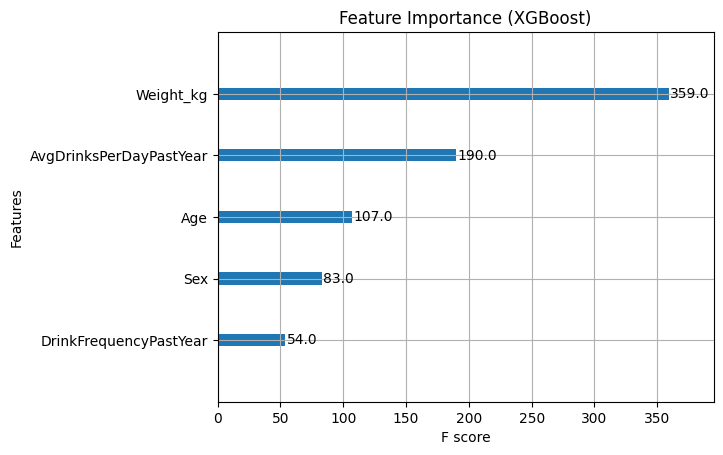

In [13]:

# Plot Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance (XGBoost)')
plt.show()

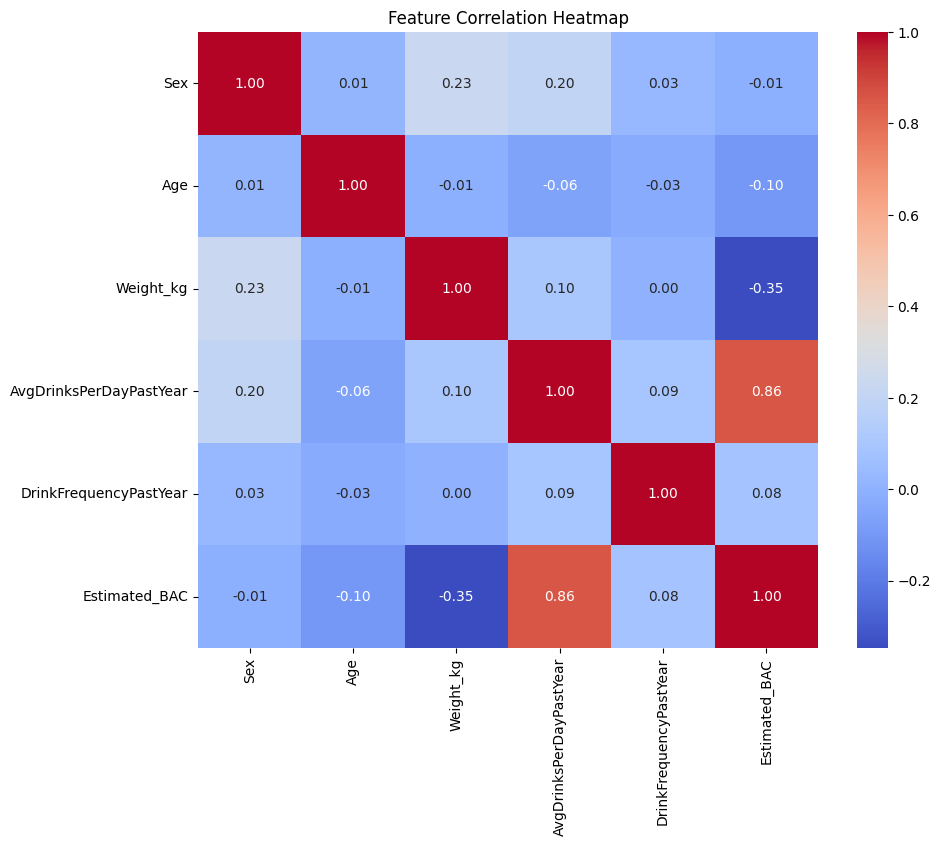

In [15]:

# Calculate correlation matrix
corr_matrix = merged_clean[['Sex', 'Age', 'Weight_kg', 'AvgDrinksPerDayPastYear', 'DrinkFrequencyPastYear', 'Estimated_BAC']].copy()

# Map 'Sex' to numbers (in case it's still words)
corr_matrix['Sex'] = corr_matrix['Sex'].map({'Male': 1, 'Female': 0})
# Convert AvgDrinksPerDayPastYear and DrinkFrequencyPastYear to numeric
corr_matrix['AvgDrinksPerDayPastYear'] = pd.to_numeric(corr_matrix['AvgDrinksPerDayPastYear'], errors='coerce')
corr_matrix['DrinkFrequencyPastYear'] = pd.to_numeric(corr_matrix['DrinkFrequencyPastYear'], errors='coerce')
corr = corr_matrix.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:

# 3. BAC classification function
def classify_bac(bac):
    if bac < 0.02:
        return "Sober: No alcohol in your blood."
    elif bac < 0.05:
        return "Tipsy: Altered mood, relaxation, slight loss of judgment."
    elif bac < 0.08:
        return "Buzzed: Uninhibited, lowered alertness, impaired judgment."
    elif bac < 0.10:
        return "Legally Impaired: Reduced coordination, impaired judgment and reasoning."
    elif bac < 0.15:
        return "Drunk: Reduced reaction time, slurred speech, slowed thinking."
    elif bac < 0.30:
        return "Very Drunk: Altered mood, nausea, vomiting, loss of balance and muscle control."
    elif bac < 0.40:
        return "Severe Alcohol Poisoning: Alcohol poisoning, loss of consciousness."
    else:
        return "Fatal Risk: Potentially fatal, risk of coma and death."

# 4. Safe user input functions
def get_sex():
    while True:
        sex = input("Enter your sex (Male/Female): ").strip().lower()
        if sex in ['male', 'female']:
            return sex
        else:
            print("❗Invalid input. Please type 'Male' or 'Female'.")

def get_float(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("❗Invalid input. Please enter a number.")

def get_positive_int(prompt):
    while True:
        try:
            value = int(input(prompt))
            if value > 0:
                return value
            else:
                print("❗Please enter a positive integer.")
        except ValueError:
            print("❗Invalid input. Please enter an integer.")

# Get clean user input
sex_input = get_sex()
age_input = get_float("Enter your age (years): ")
weight_input = get_float("Enter your weight (kg): ")
frequency_input = get_float("Enter your drinking frequency per year (days): ")
max_drinks = get_positive_int("Up to how many drinks do you want to simulate? (e.g., 10): ")

# 6. Convert sex to numeric
sex_numeric = 1 if sex_input == 'male' else 0

# 7. Simulate drinks
print("\n--- BAC and Intoxication Levels ---")
for drinks in range(1, max_drinks + 1):
    user_data = pd.DataFrame({
        'Sex': [sex_numeric],
        'Age': [age_input],
        'Weight_kg': [weight_input],
        'AvgDrinksPerDayPastYear': [drinks],
        'DrinkFrequencyPastYear': [frequency_input]
    })

    predicted_bac = model.predict(user_data)[0]
    intoxication_level = classify_bac(predicted_bac)
    
    print(f"\nAfter {drinks} drink(s):")
    print(f"Predicted BAC: {predicted_bac:.4f}")
    print(f"Intoxication Level: {intoxication_level}")

print("\n✅ Simulation complete!")


--- BAC and Intoxication Levels ---

After 1 drink(s):
Predicted BAC: 0.0476
Intoxication Level: Tipsy: Altered mood, relaxation, slight loss of judgment.

After 2 drink(s):
Predicted BAC: 0.0476
Intoxication Level: Tipsy: Altered mood, relaxation, slight loss of judgment.

After 3 drink(s):
Predicted BAC: 0.0476
Intoxication Level: Tipsy: Altered mood, relaxation, slight loss of judgment.

After 4 drink(s):
Predicted BAC: 0.0767
Intoxication Level: Buzzed: Uninhibited, lowered alertness, impaired judgment.

After 5 drink(s):
Predicted BAC: 0.1023
Intoxication Level: Drunk: Reduced reaction time, slurred speech, slowed thinking.

After 6 drink(s):
Predicted BAC: 0.1226
Intoxication Level: Drunk: Reduced reaction time, slurred speech, slowed thinking.

After 7 drink(s):
Predicted BAC: 0.1226
Intoxication Level: Drunk: Reduced reaction time, slurred speech, slowed thinking.

✅ Simulation complete!
